In [14]:
# Kindly change the below cells from markdown to code and execute it 
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [15]:
df_soilhealth=pd.read_excel("Compile_data_final.xlsx")

df_soilhealth.head()

pH  EC (ds/m)  OC (%)  Available N (kg/ha)  Avaiable P2O5 (Kg/ha)  \
0  4.6       0.47    1.02               475.95                  12.33   
1  4.8       0.50    1.04               425.26                  14.56   
2  4.9       0.62    0.92               450.34                  18.68   
3  4.5       0.59    0.94               412.69                  21.76   
4  4.3       0.64    1.06               454.23                  13.42   

   Available K 20 (kg/ha )  CEC (meq/100gram)  Ca 2+ (meq/100gram)  \
0                   154.29               10.1                 2.35   
1                   165.17               11.2                 2.74   
2                   146.61               11.6                 3.23   
3                   110.07               10.2                 2.15   
4                   109.26               11.1                 2.81   

   Mg 2+ (meq/100gram)  Na 2+ (meq/100 gram)  ...  Total porosity(%)  \
0                 1.56                  0.25  ...          47.107438   
1                 1.96                  0.28  ...          44.000000   
2                 1.52                  0.27  ...          46.929825   
3                 1.34                  0.24  ...          44.303797   
4                 1.56                  0.26  ...          42.477876   

   Maximum water holding capacity (%)  Volume Expansion %  FC (%) at 0.3 bar  \
0                                39.6                9.19              29.30   
1                                41.6                9.16              31.28   
2                                39.1                8.64              28.28   
3                                41.5                9.52              30.52   
4                                41.9                8.85              32.36   

   PWP (% ) at 15 bar  Available Water (%)  Microaggregate  % ( MIG)  \
0                5.14                24.16                 43.366516   
1                5.83                25.45                 48.974315   
2                5.21                23.07                 48.760181   
3                5.46                25.06                 49.602941   
4                5.61                26.75                 39.811060   

   Macroaggregate % (MAG)       MWD       SQI  
0               56.633484  1.963947  0.777348  
1               51.025685  1.851164  0.842848  
2               51.239819  1.851439  0.859669  
3               50.397059  1.819625  0.800230  
4               60.188940  1.858099  0.811392  

[5 rows x 32 columns]

In [16]:
df_soilhealth.shape

(180, 32)

In [17]:
df_soilhealth.dtypes

pH                                    float64
EC (ds/m)                             float64
OC (%)                                float64
Available N (kg/ha)                   float64
Avaiable P2O5 (Kg/ha)                 float64
Available K 20 (kg/ha )               float64
CEC (meq/100gram)                     float64
Ca 2+ (meq/100gram)                   float64
Mg 2+ (meq/100gram)                   float64
Na 2+ (meq/100 gram)                  float64
% Base saturation                     float64
Fe (ppm)                              float64
Cu (ppm)                              float64
Mn (ppm)                              float64
Zn(ppm)                               float64
S (ppm)                               float64
SAND (%)                              float64
SILT(%)                               float64
CLAY (%)                              float64
Hydraulic Conductivity (cm/hr)        float64
PD (gm/cm3) **Pycnometer              float64
BD (gm/cm3)** core method         

In [18]:
df_soilhealth.describe()

pH   EC (ds/m)      OC (%)  Available N (kg/ha)  \
count  180.000000  180.000000  180.000000           180.000000   
mean     5.237778    0.542444    0.809500           380.015944   
std      0.625809    0.136924    0.212488            90.295891   
min      4.100000    0.250000    0.210000           200.740000   
25%      4.800000    0.480000    0.660000           302.300000   
50%      5.150000    0.540000    0.840000           375.420000   
75%      5.600000    0.650000    0.980000           454.377500   
max      6.800000    0.790000    1.200000           566.780000   

       Avaiable P2O5 (Kg/ha)  Available K 20 (kg/ha )  CEC (meq/100gram)  \
count             180.000000               180.000000         180.000000   
mean               26.862833               169.396478           6.745556   
std                12.757704                89.097543           1.957975   
min                 7.020000                49.100000           4.400000   
25%                14.820000                98.945000           5.300000   
50%                24.740000               137.090000           5.900000   
75%                36.790000               234.125000           8.100000   
max                56.940000               398.360000          11.600000   

       Ca 2+ (meq/100gram)  Mg 2+ (meq/100gram)  Na 2+ (meq/100 gram)  ...  \
count           180.000000           180.000000            180.000000  ...   
mean              1.368889             0.900167              0.190611  ...   
std               0.530684             0.363529              0.052493  ...   
min               0.750000             0.420000              0.110000  ...   
25%               0.960000             0.640000              0.150000  ...   
50%               1.120000             0.820000              0.180000  ...   
75%               1.780000             0.980000              0.230000  ...   
max               3.230000             1.980000              0.340000  ...   

       Total porosity(%)  Maximum water holding capacity (%)  \
count         180.000000                          180.000000   
mean           47.167598                           33.692222   
std             2.736142                            4.423736   
min            41.228070                           26.100000   
25%            45.095848                           29.950000   
50%            47.094575                           32.900000   
75%            48.894799                           37.800000   
max            53.846154                           42.900000   

       Volume Expansion %  FC (%) at 0.3 bar  PWP (% ) at 15 bar  \
count          180.000000         180.000000          180.000000   
mean             8.123889          28.549056            6.731667   
std              0.868528           4.054303            1.109912   
min              6.180000          20.400000            4.450000   
25%              7.447500          25.500000            5.827500   
50%              8.125000          28.295000            6.730000   
75%              8.840000          31.370000            7.680000   
max             10.850000          36.680000            8.980000   

       Available Water (%)  Microaggregate  % ( MIG)  Macroaggregate % (MAG)  \
count           180.000000                180.000000              180.000000   
mean             21.817389                 43.130447               56.869553   
std               4.231027                  5.339804                5.339804   
min              14.780000                 30.246032               40.452489   
25%              18.515000                 39.772888               55.063907   
50%              20.915000                 42.021036               57.978964   
75%              25.015000                 44.936093               60.227112   
max              31.860000                 59.547511               69.753968   

              MWD         SQI  
count  180.000000  180.000000  
mean     1.879152    0.624450  
std      0.170890    0.09

In [19]:
df_soilhealth.isnull().sum()

pH                                    0
EC (ds/m)                             0
OC (%)                                0
Available N (kg/ha)                   0
Avaiable P2O5 (Kg/ha)                 0
Available K 20 (kg/ha )               0
CEC (meq/100gram)                     0
Ca 2+ (meq/100gram)                   0
Mg 2+ (meq/100gram)                   0
Na 2+ (meq/100 gram)                  0
% Base saturation                     0
Fe (ppm)                              0
Cu (ppm)                              0
Mn (ppm)                              0
Zn(ppm)                               0
S (ppm)                               0
SAND (%)                              0
SILT(%)                               0
CLAY (%)                              0
Hydraulic Conductivity (cm/hr)        0
PD (gm/cm3) **Pycnometer              0
BD (gm/cm3)** core method             0
Total porosity(%)                     0
Maximum water holding capacity (%)    0
Volume Expansion %                    0


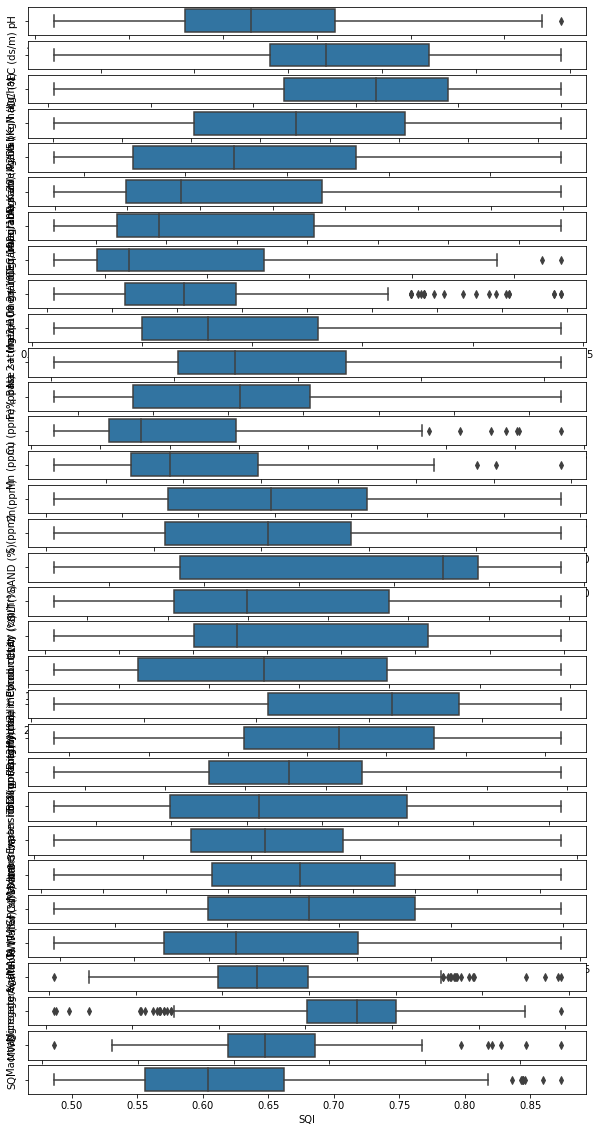

In [20]:
plt.figure(figsize=(10,20))
for i,col in enumerate(df_soilhealth,1):
    plt.subplot(32,1,i)
    sns.boxplot(df_soilhealth[col])
    plt.ylabel(col)
plt.show()

In [21]:
# calculate the first quartile
Q1 = df_soilhealth.quantile(0.25)

# calculate the third quartile
Q3 = df_soilhealth.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_soilhealth_remoutlier = df_soilhealth[~((df_soilhealth < (Q1 - 1.5 * IQR)) | (df_soilhealth > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_soilhealth_remoutlier.shape

(126, 32)

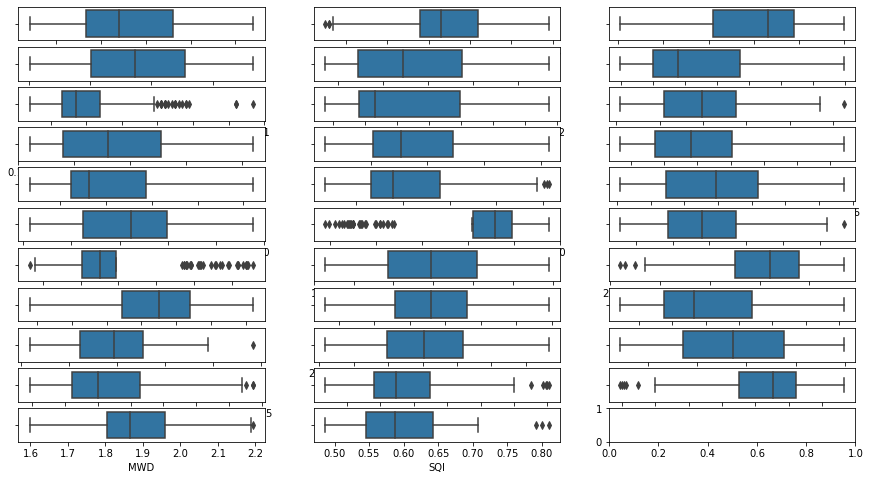

In [22]:
# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 11, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_soilhealth_remoutlier.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_soilhealth_remoutlier[variable], ax = subplot)

# display the plot
plt.show()

In [23]:
df_soilhealth_remoutlier.corr()

pH  EC (ds/m)    OC (%)  \
pH                                  1.000000   0.086987  0.242896   
EC (ds/m)                           0.086987   1.000000  0.562892   
OC (%)                              0.242896   0.562892  1.000000   
Available N (kg/ha)                 0.110528   0.494678  0.760846   
Avaiable P2O5 (Kg/ha)               0.114713  -0.227925 -0.075517   
Available K 20 (kg/ha )             0.078848   0.039941  0.153390   
CEC (meq/100gram)                  -0.562974   0.239992 -0.065364   
Ca 2+ (meq/100gram)                -0.474156   0.234231  0.017983   
Mg 2+ (meq/100gram)                -0.119876   0.121580  0.094987   
Na 2+ (meq/100 gram)               -0.096133   0.214249  0.232748   
% Base saturation                   0.231845   0.032318  0.236059   
Fe (ppm)                           -0.678966  -0.205761 -0.263933   
Cu (ppm)                            0.029605   0.042096  0.005477   
Mn (ppm)                           -0.610733   0.132470 -0.077960   
Zn(ppm)                             0.091697   0.339891  0.310312   
S (ppm)                             0.462087  -0.194115 -0.007490   
SAND (%)                            0.541749  -0.350864 -0.015675   
SILT(%)                            -0.533790   0.396320  0.116972   
CLAY (%)                           -0.455840   0.250040 -0.090900   
Hydraulic Conductivity (cm/hr)      0.580549  -0.155064  0.090049   
PD (gm/cm3) **Pycnometer            0.423783  -0.333196 -0.185522   
BD (gm/cm3)** core method           0.360340  -0.288881 -0.138480   
Total porosity(%)                  -0.042972   0.028339 -0.015113   
Maximum water holding capacity (%) -0.543452   0.370218  0.077870   
Volume Expansion %                 -0.274011   0.070208 -0.019609   
FC (%) at 0.3 bar                  -0.396054   0.445366  0.129726   
PWP (% ) at 15 bar                  0.206152   0.103084  0.340114   
Available Water (%)                -0.425744   0.389818  0.031202   
Microaggregate  % ( MIG)           -0.391324  -0.253275 -0.210563   
Macroaggregate % (MAG)              0.391324   0.253275  0.210563   
MWD                                -0.174582   0.103218 -0.116994   
SQI                                -0.485078   0.330652  0.244599   

                                    Available N (kg/ha)  \
pH                                             0.110528   
EC (ds/m)                                      0.494678   
OC (%)                                         0.760846   
Available N (kg/ha)                            1.000000   
Avaiable P2O5 (Kg/ha)                         -0.074008   
Available K 20 (kg/ha )                       -0.001746   
CEC (meq/100gram)                             -0.013940   
Ca 2+ (meq/100gram)                            0.079656   
Mg 2+ (meq/100gram)                            0.144898   
Na 2+ (meq/100 gram)                           0.134181   
% Base saturation                              0.118996   
Fe (ppm)                                      -0.146659   
Cu (ppm)                                       0.039712   
Mn (ppm)                                      -0.016954   
Zn(ppm)                                        0.234613   
S (ppm)                                        0.002203   
SAND (%)                                      -0.020956   
SILT(%)                                        0.078558   
CLAY (%)                                      -0.043001   
Hydraulic Conductivity (cm/hr)                 0.047711   
PD (gm/cm3) **Pycnometer                      -0.175763   
BD (gm/cm3)** core method                     -0.071327   
Total porosity(%)                             -0.080524   
Maximum water holding capacity (%)             0.066852   
Volume Expansion %                            -0.101577   
FC (%) at 0.3 bar                              0.104192   
PWP (% ) at 15 bar                             0.244239   
Available Water (%)                            0.032743   
Microaggregate  % ( MIG)                      -0.2014

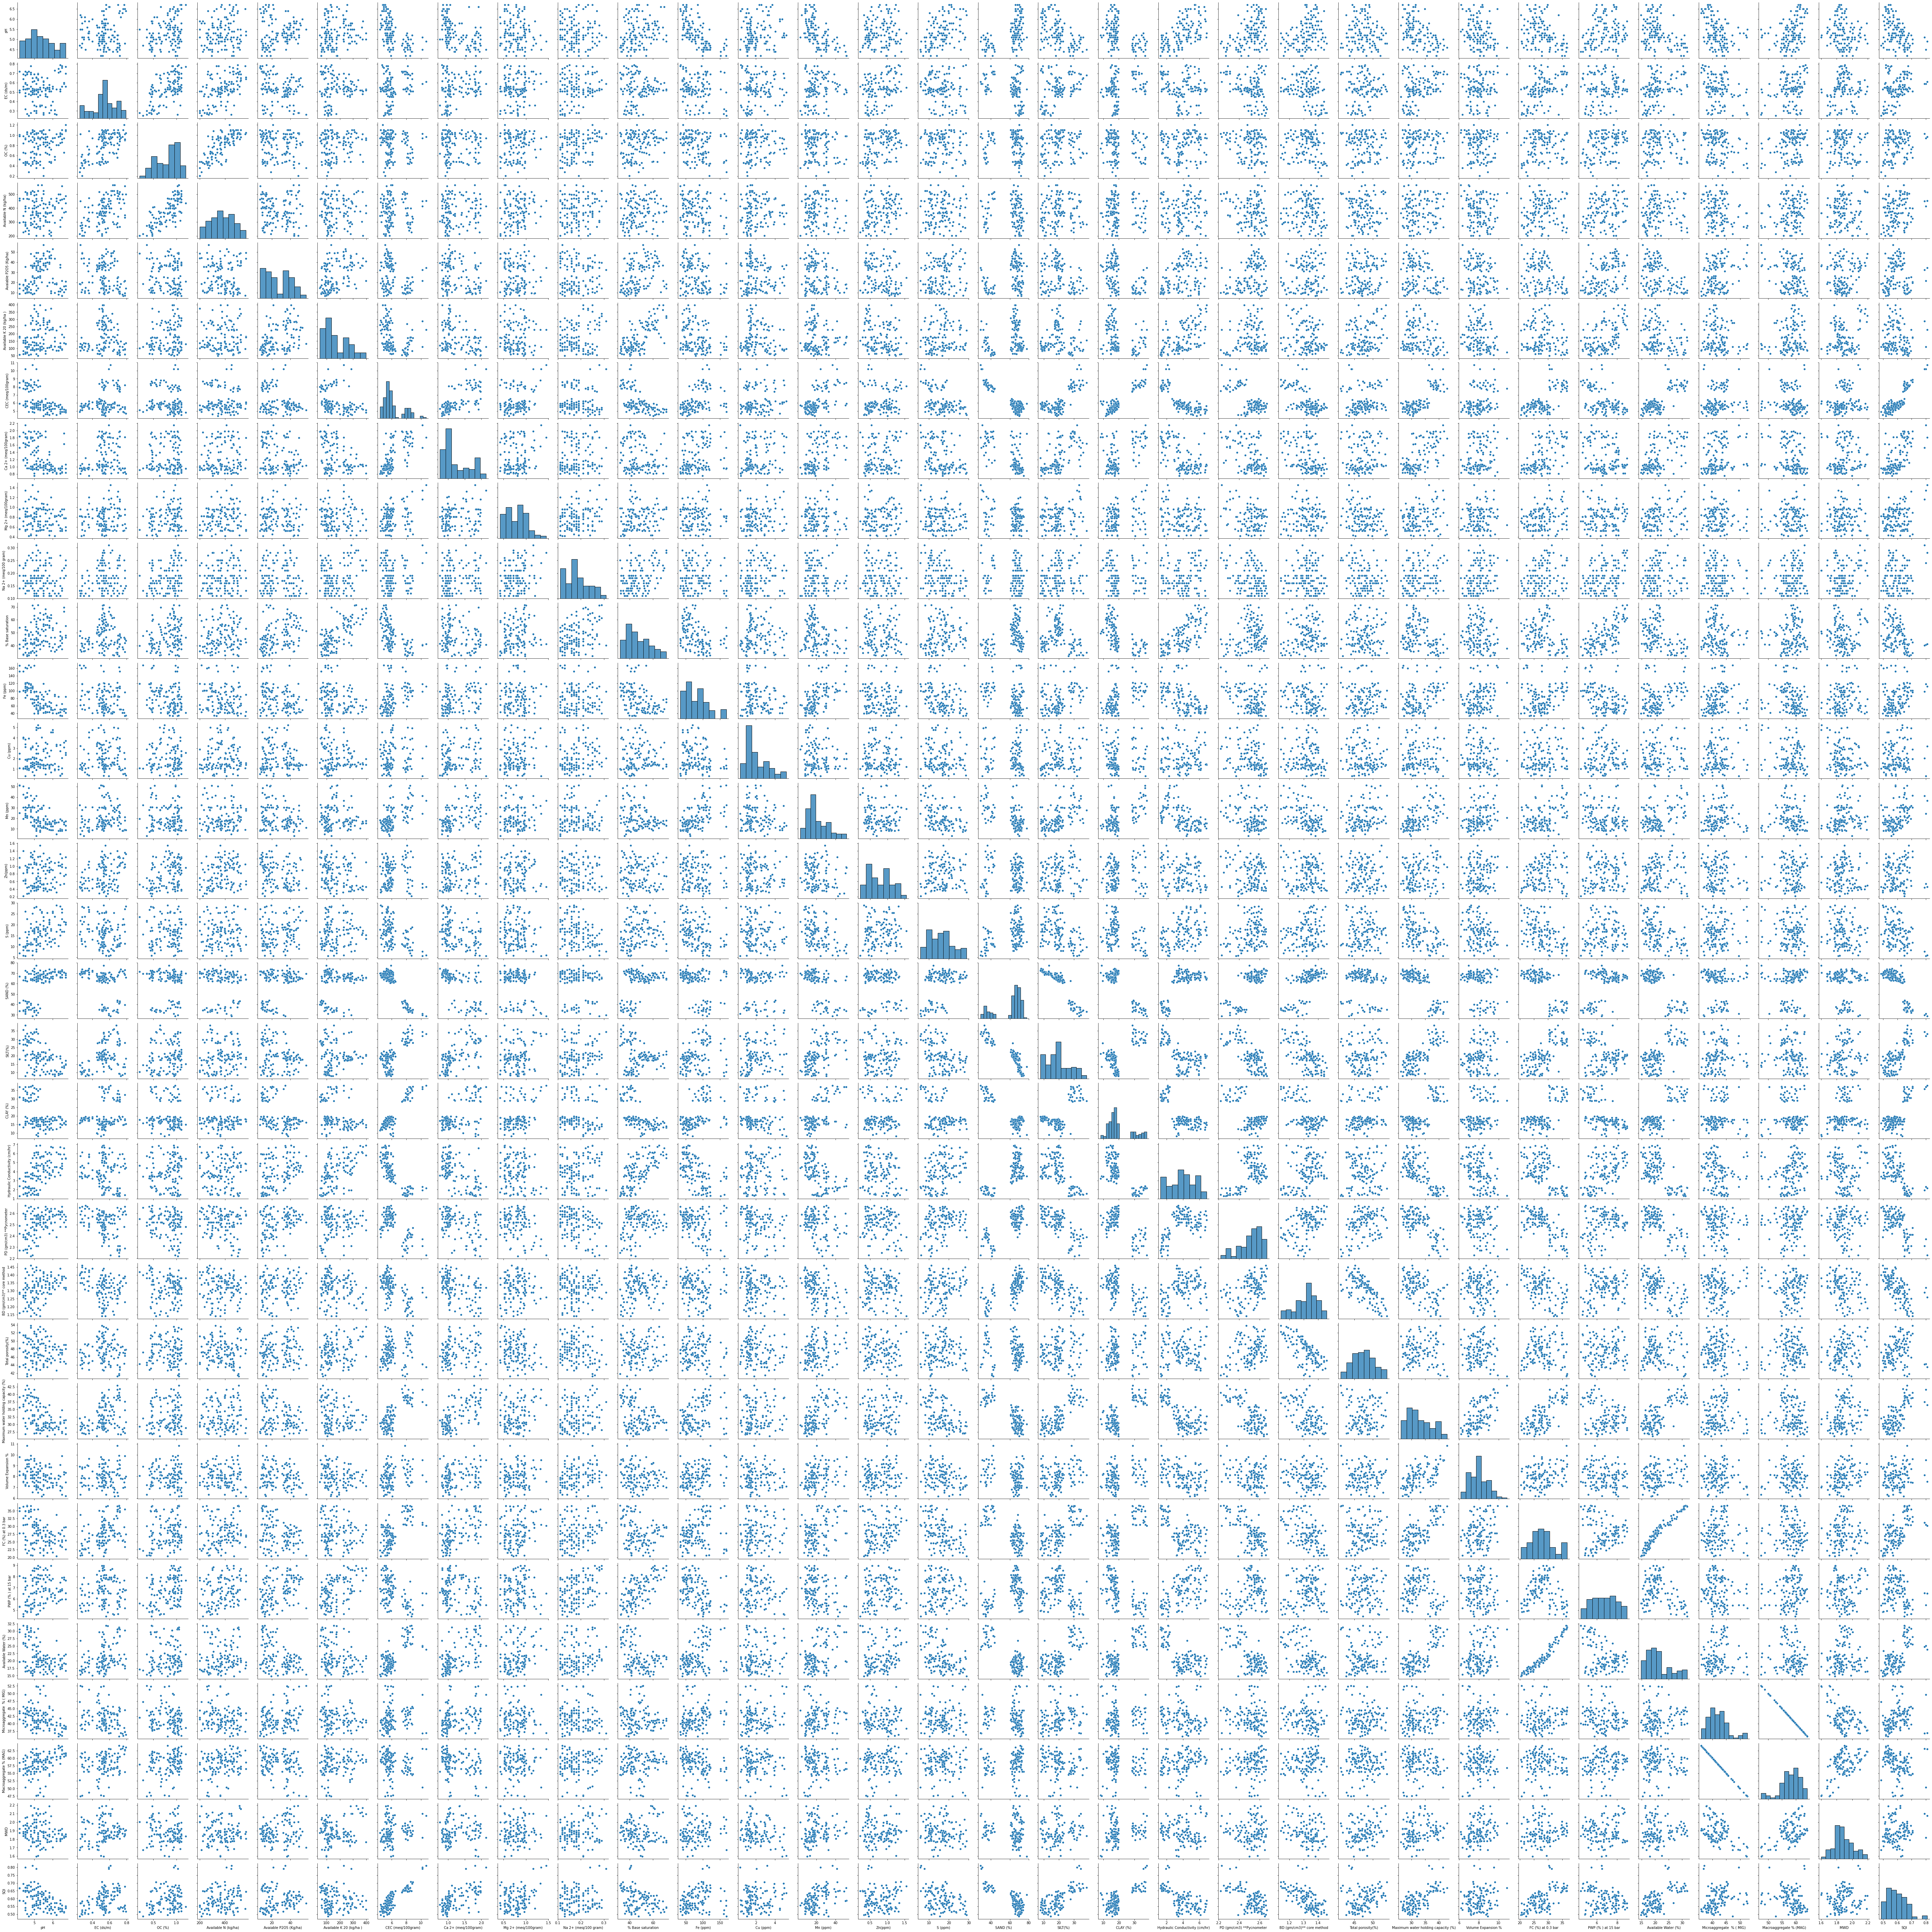

In [24]:
sns.pairplot(df_soilhealth_remoutlier);

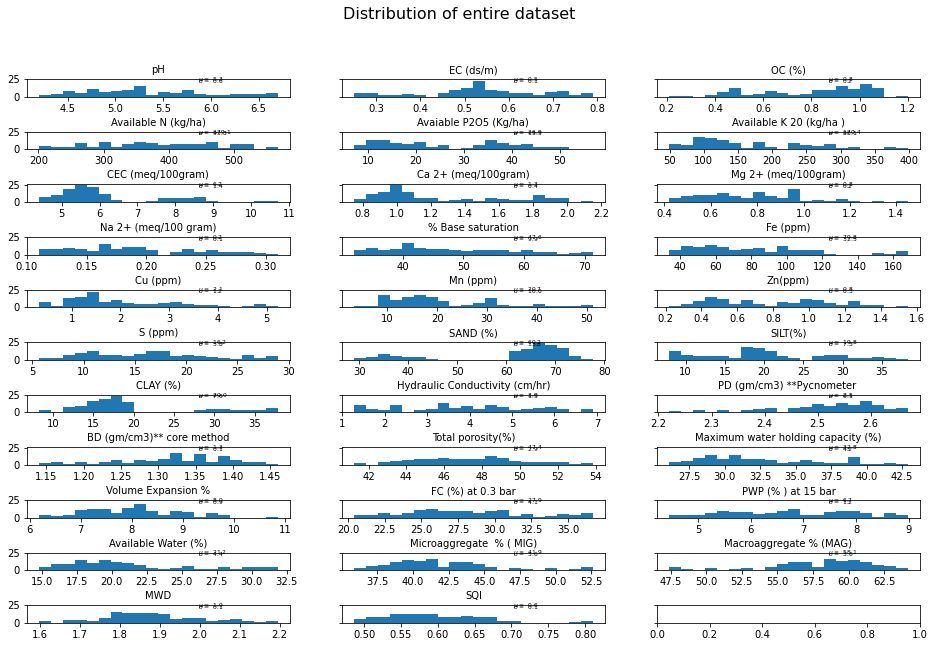

In [25]:
# Plotting Distributions of Columns
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
fig, ax = plt.subplots(11, 3, sharey = True, figsize = [16, 10])
fig.suptitle('Distribution of entire dataset', fontsize = 16)
fig.subplots_adjust(hspace = 2)
i = 0
j = 0
for col in df_soilhealth_remoutlier.columns:
    ax[i, j].hist(df_soilhealth_remoutlier[col], bins = 20, histtype = 'bar')
    ax[i, j].set_title(col, fontsize = 10)
    ax[i, j].text(0.65, 0.9, r"$\mu$ = {: .1f}".format(df_soilhealth_remoutlier[col].mean()), transform = ax[i, j].transAxes, fontsize = 6)
    ax[i, j].text(0.65, 0.8, r"$\sigma$ = {: .1f}".format(df_soilhealth_remoutlier[col].std()), transform = ax[i, j].transAxes, fontsize = 6)
    if j < 2:
        j += 1
    else:
        i += 1
        j -= 2

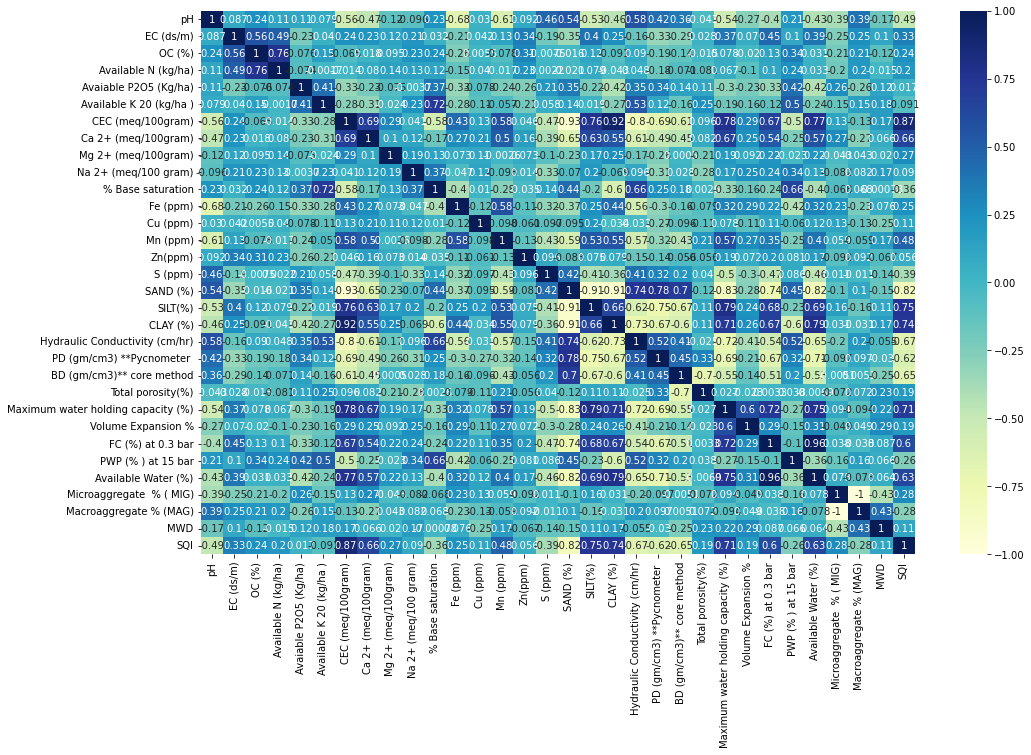

In [26]:
plt.figure(figsize = [16, 10])
sns.heatmap(df_soilhealth_remoutlier.corr(), annot=True, cmap='YlGnBu');

In [27]:
df_soilhealth_remoutlier.to_excel("EDA_SOilHealth.xlsx")